/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 183s 5s/step - accuracy: 0.4886 - loss: 1.0068 - val_accuracy: 0.6555 - val_loss: 0.8432
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 166s 5s/step - accuracy: 0.6716 - loss: 0.7597 - val_accuracy: 0.6933 - val_loss: 0.7675
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.7445 - loss: 0.5907 - val_accuracy: 0.6639 - val_loss: 0.7451
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 203s 5s/step - accuracy: 0.7545 - loss: 0.5541 - val_accuracy: 0.7185 - val_loss: 0.7163
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 197s 5s/step - accuracy: 0.7969 - loss: 0.4495 - val_accuracy: 0.7017 - val_loss: 0.7602
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.8586 - loss: 0.3419 - val_accuracy: 0.7605 - val_loss: 0.8645
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - accuracy: 0.8992 - loss: 0.2455 - val_accuracy: 0.7941 - val_loss: 0.8183
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 207s 5s/step - accuracy: 0.9639 - loss: 0.1546 - val_accuracy: 0.7983 - v

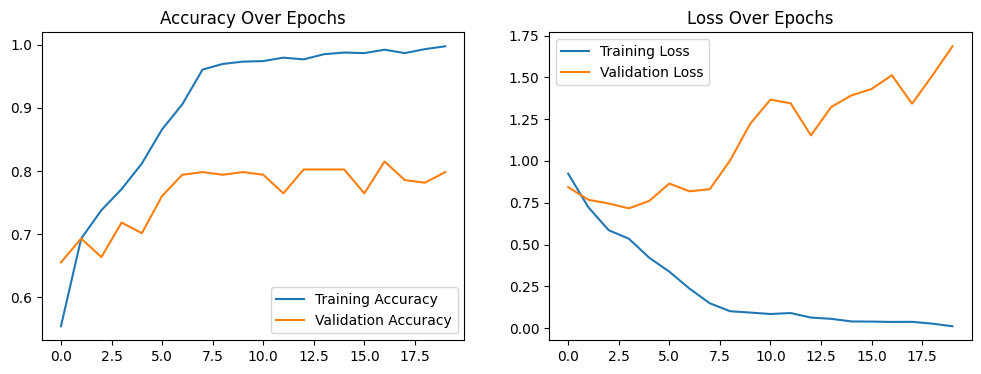

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/Colab Datasets/mamo_dataset'  # Mamografi görüntülerinizi içeren ana klasör
categories = ['benign', 'malignant', 'normal']  # Klasör adlarınız

images = []
labels = []
img_size = 224

for idx, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_size, img_size))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(idx)  # Etiketleri (0, 1, 2) olarak ekleyin
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

images = np.array(images) / 255.0  # Normalize edin
labels = np.array(labels)

X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Çok sınıflı çıktı için softmax kullanın
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

predictions = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, predictions, target_names=categories))
print(confusion_matrix(y_test, predictions))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

# Modeli kaydetme
model.save('mamografi_cnn_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Gerçek sınıf: normal
Tahmin edilen sınıf: benign


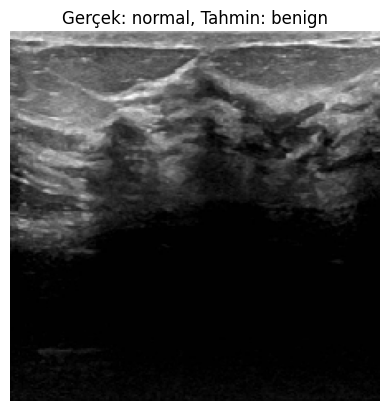

In [32]:
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


random_category = random.choice(categories)
category_path = os.path.join(data_dir, random_category)
random_image_name = random.choice(os.listdir(category_path))
image_path = os.path.join(category_path, random_image_name)


img = image.load_img(image_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


prediction = np.argmax(model.predict(img_array), axis=1)[0]
predicted_label = categories[prediction]
real_label = random_category


print(f"Gerçek sınıf: {real_label}")
print(f"Tahmin edilen sınıf: {predicted_label}")


plt.imshow(img)
plt.title(f"Gerçek: {real_label}, Tahmin: {predicted_label}")
plt.axis('off')
plt.show()
